In [1]:
# Step 1: imports
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_error, r2_score

# Base regressors to try inside clusters
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42


In [2]:
#  Load Dataset
file_path = "study.csv" 
df = pd.read_csv(file_path)
df.head()

,29/4/23,gender\nstudent's sex (binary: 'F' - female or 'M' - male),age\nstudent's age (numeric: from 15 to 22),adress\nstudent's home address type (binary: 'U' - urban or 'R' - rural),famsize\nfamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3),Pstatus\nparent's cohabitation status (binary: 'T' - living together or 'A' - apart),M_Education,F_education,"Mjob\nmother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other","Fjob\nfather's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other",relationship_breakdown,smoker,avarage_tution_fee_cost,time_spent_with_friends,ssc_result,hsc_result
0,29/4/23,M,23,U,GT3,T,2,3,other,other,yes,No,400000,4,4.39,4.33
1,29/4/23,M,22,U,GT3,T,3,4,at_home,other,yes,yes,400000,2,4.20,4.17
2,29/4/23,M,24,R,GT3,T,1,3,at_home,teacher,yes,yes,293000,3,3.92,4.17
3,29/4/23,F,22,U,GT3,T,3,4,at_home,other,No,No,293000,8,5.00,5.00
4,29/4/23,M,23,U,GT3,T,4,4,teacher,other,No,No,295000,8,4.92,4.70


In [3]:
df.columns = [
    "date",
    "gender",
    "age",
    "address",
    "famsize",
    "pstatus",
    "M_education",
    "F_education",
    "Mjob",
    "Fjob",
    "relationship_breakdown",
    "smoker",
    "average_tuition_fee",
    "time_spent_with_friends",
    "SSC_result",
    "HSC_result"
]
df.head()

,date,gender,age,address,famsize,pstatus,M_education,F_education,Mjob,Fjob,relationship_breakdown,smoker,average_tuition_fee,time_spent_with_friends,SSC_result,HSC_result
0,29/4/23,M,23,U,GT3,T,2,3,other,other,yes,No,400000,4,4.39,4.33
1,29/4/23,M,22,U,GT3,T,3,4,at_home,other,yes,yes,400000,2,4.20,4.17
2,29/4/23,M,24,R,GT3,T,1,3,at_home,teacher,yes,yes,293000,3,3.92,4.17
3,29/4/23,F,22,U,GT3,T,3,4,at_home,other,No,No,293000,8,5.00,5.00
4,29/4/23,M,23,U,GT3,T,4,4,teacher,other,No,No,295000,8,4.92,4.70


In [4]:
# Drop date column
df.drop(columns=["date"], inplace=True)
df.head()

,gender,age,address,famsize,pstatus,M_education,F_education,Mjob,Fjob,relationship_breakdown,smoker,average_tuition_fee,time_spent_with_friends,SSC_result,HSC_result
0,M,23,U,GT3,T,2,3,other,other,yes,No,400000,4,4.39,4.33
1,M,22,U,GT3,T,3,4,at_home,other,yes,yes,400000,2,4.20,4.17
2,M,24,R,GT3,T,1,3,at_home,teacher,yes,yes,293000,3,3.92,4.17
3,F,22,U,GT3,T,3,4,at_home,other,No,No,293000,8,5.00,5.00
4,M,23,U,GT3,T,4,4,teacher,other,No,No,295000,8,4.92,4.70


/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/scipy/_lib/_util.py:1272: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/scipy/_lib/_util.py:1272: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/scipy/_lib/_util.py:1272: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


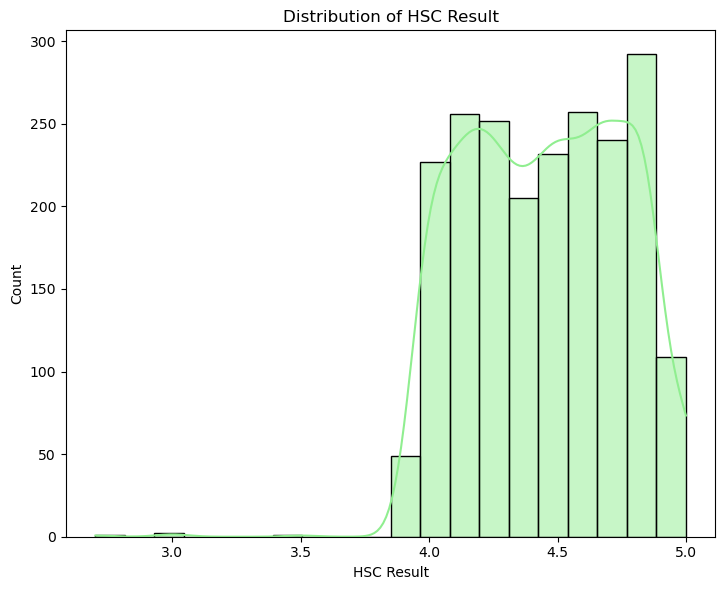

In [5]:
# Step 4: Visualize SSC and HSC Result Distributions
plt.figure(figsize=(14, 6))

# HSC result distribution
plt.subplot(1, 2, 2)
sns.histplot(df["HSC_result"], kde=True, bins=20, color="lightgreen")
plt.title("Distribution of HSC Result")
plt.xlabel("HSC Result")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [6]:
# Convert binary nominal features to numeric

# Define mappings
binary_mappings = {
    'gender': {'M': 1, 'F': 0},
    'address': {'U': 1, 'R': 0},
    'famsize': {'GT3': 1, 'LE3': 0},
    'pstatus': {'T': 1, 'A': 0},
    'relationship_breakdown': {'yes': 1, 'No': 0},
    'smoker': {'yes': 1, 'No': 0}
}

# Apply mappings
for column, mapping in binary_mappings.items():
    df[column] = df[column].map(mapping)

# Preview converted columns
display(df[['gender', 'address', 'famsize', 'pstatus', 'relationship_breakdown', 'smoker']].head())


,gender,address,famsize,pstatus,relationship_breakdown,smoker
0,1,1,1,1.0,1.0,0.0
1,1,1,1,1.0,1.0,1.0
2,1,0,1,1.0,1.0,1.0
3,0,1,1,1.0,0.0,0.0
4,1,1,1,1.0,0.0,0.0


In [7]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Strip whitespaces
df['Mjob'] = df['Mjob'].str.strip()
df['Fjob'] = df['Fjob'].str.strip()

# Step 2: Encode as integer labels
le_mjob = LabelEncoder()
le_fjob = LabelEncoder()

df['Mjob_cat'] = le_mjob.fit_transform(df['Mjob'])
df['Fjob_cat'] = le_fjob.fit_transform(df['Fjob'])

# Step 3: Drop original string columns
df.drop(['Mjob', 'Fjob'], axis=1, inplace=True)

# Confirm integer dtypes and preview
display(df.head())

,gender,age,address,famsize,pstatus,M_education,F_education,relationship_breakdown,smoker,average_tuition_fee,time_spent_with_friends,SSC_result,HSC_result,Mjob_cat,Fjob_cat
0,1,23,1,1,1.0,2,3,1.0,0.0,400000,4,4.39,4.33,2,2
1,1,22,1,1,1.0,3,4,1.0,1.0,400000,2,4.20,4.17,0,2
2,1,24,0,1,1.0,1,3,1.0,1.0,293000,3,3.92,4.17,0,4
3,0,22,1,1,1.0,3,4,0.0,0.0,293000,8,5.00,5.00,0,2
4,1,23,1,1,1.0,4,4,0.0,0.0,295000,8,4.92,4.70,4,2


In [8]:
# ===== Feature Engineering =====

# 1. Average Parental Education
df['avg_parent_edu'] = (df['M_education'] + df['F_education']) / 2

# 2. SSC × Parental Education Interaction
df['ssc_parentedu_interaction'] = df['SSC_result'] * df['avg_parent_edu']

# 3. Combined Social Interaction Score
df['social_combined'] = df['time_spent_with_friends'] * (1 - df['relationship_breakdown']) * (1 - df['smoker'])

# 4. Binary Risk Flags
df['low_ssc_flag'] = (df['SSC_result'] < 3.0).astype(int)
df['low_parentedu_flag'] = (df['avg_parent_edu'] < 2).astype(int)
df['unstable_env_flag'] = ((df['relationship_breakdown'] == 1) | (df['smoker'] == 1)).astype(int)

# 5. Family Education Imbalance
df['edu_imbalance'] = abs(df['M_education'] - df['F_education'])

# 6. Social Index Score
df['social_index'] = (
    0.3 * df['time_spent_with_friends'] -
    0.4 * df['relationship_breakdown'] -
    0.3 * df['smoker']
)

# 7. SSC Efficiency
df['ssc_time_efficiency'] = df['SSC_result'] / (df['time_spent_with_friends'] + 1)

# 8. Drop Weak or Redundant Features
df.drop(['pstatus', 'address', 'Mjob_cat', 'Fjob_cat'], axis=1, inplace=True)


In [9]:
from sklearn.model_selection import train_test_split

# Drop 'age' from features and define target as HSC_result
X = df.drop(columns=['age','HSC_result'])
y = df['HSC_result']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1698, 18)
X_test shape: (425, 18)
y_train shape: (1698,)
y_test shape: (425,)


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Step 2: Scale only selected columns
scale_vars = ['average_tuition_fee', 'time_spent_with_friends']

scaler = MinMaxScaler()
# Apply scaling to selected columns
X_train_imputed[scale_vars] = scaler.fit_transform(X_train_imputed[scale_vars])
X_test_imputed[scale_vars] = scaler.transform(X_test_imputed[scale_vars])

# Final scaled data
X_train_scaled = X_train_imputed.copy()
X_test_scaled = X_test_imputed.copy()

# Preview
X_train_scaled[scale_vars].head()

# Scale all features for K-Means clustering
scaler_all = StandardScaler()
X_train_km_scaled = pd.DataFrame(scaler_all.fit_transform(X_train_imputed),
                                 columns=X_train_imputed.columns, index=X_train_imputed.index)
X_test_km_scaled  = pd.DataFrame(scaler_all.transform(X_test_imputed),
                                 columns=X_test_imputed.columns, index=X_test_imputed.index)

print("Model matrix shape:", X_train_scaled.shape, " | KMeans matrix shape:", X_train_km_scaled.shape)

Model matrix shape: (1698, 18)  | KMeans matrix shape: (1698, 18)


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np

def evaluate_regressors_linear(train_X, train_y, test_X, test_y):
    regressors = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
    }
    
    results1 = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    
    for name, regressor in regressors.items():
        regressor.fit(train_X, train_y)
        predictions = regressor.predict(test_X)
        
        mse = mean_squared_error(test_y, predictions)
        rmse = np.sqrt(mse)  
        mae = mean_absolute_error(test_y, predictions)
        r2 = r2_score(test_y, predictions)
        
        results1.loc[name] = [mse, rmse, mae, r2]
    
    return results1


def evaluate_regressors_krnl(train_X, train_y, test_X, test_y):
    regressors3 = {
        'KNN Regressor': KNeighborsRegressor(),
        'SVR': SVR(),
    }
    
    results3 = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    
    for name, regressor in regressors3.items():
        regressor.fit(train_X, train_y)
        predictions = regressor.predict(test_X)
        
        mse = mean_squared_error(test_y, predictions)
        rmse = np.sqrt(mse)  
        mae = mean_absolute_error(test_y, predictions)
        r2 = r2_score(test_y, predictions)
        
        results3.loc[name] = [mse, rmse, mae, r2]
    
    return results3


def evaluate_regressors_tress(train_X, train_y, test_X, test_y):
    regressors2 = {
        'Random Forest': RandomForestRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
    }
    results2 = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    
    for name, regressor in regressors2.items():
        regressor.fit(train_X, train_y)
        predictions = regressor.predict(test_X)
        
        mse = mean_squared_error(test_y, predictions)
        rmse = np.sqrt(mse)  
        mae = mean_absolute_error(test_y, predictions)
        r2 = r2_score(test_y, predictions)
        
        results2.loc[name] = [mse, rmse, mae, r2]
    
    return results2

def evaluate_regressors_boosting(train_X, train_y, test_X, test_y):
    regressors = {
        'LightGBM': LGBMRegressor(random_state=42),
        'CatBoost': CatBoostRegressor(verbose=0, random_state=42)  # suppress output
    }

    results = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])

    for name, model in regressors.items():
        model.fit(train_X, train_y)
        preds = model.predict(test_X)

        mse = mean_squared_error(test_y, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_y, preds)
        r2 = r2_score(test_y, preds)

        results.loc[name] = [mse, rmse, mae, r2]

    return results

# Call with imputed data (not scaled unless needed)
results_full = evaluate_regressors_linear(X_train_imputed, y_train, X_test_imputed, y_test)
print("Results with Full Features:\n")
print(results_full)

reseults_full = evaluate_regressors_krnl(X_train_imputed, y_train, X_test_imputed, y_test)
print("\n \n Results with SVR and KNN:\n")
print(reseults_full)


results_full = evaluate_regressors_tress(X_train_imputed, y_train, X_test_imputed, y_test)
print("\n \n Results with Full Features:\n")
print(results_full)

print("\n\n")
results_full = evaluate_regressors_boosting(X_train_imputed, y_train, X_test_imputed, y_test)
print("\n \n Results with Boosting Models:\n")
print(results_full)

Results with Full Features:

                        MSE      RMSE       MAE  R2 Score
Linear Regression  0.090340  0.300566  0.260502  0.019387
Ridge Regression   0.089279  0.298796  0.261650  0.030904
Lasso Regression   0.092335  0.303867  0.268669 -0.002270


/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  


 
 Results with SVR and KNN:

                    MSE      RMSE       MAE  R2 Score
KNN Regressor  0.099153  0.314885  0.268984 -0.076274
SVR            0.089016  0.298356  0.261997  0.033757

 
 Results with Full Features:

                    MSE      RMSE       MAE  R2 Score
Random Forest  0.085299  0.292059  0.248400  0.074109
AdaBoost       0.084816  0.291233  0.258982  0.079342
XGBoost        0.104224  0.322838  0.268676 -0.131324



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 1698, number of used features: 15
[LightGBM] [Info] Start training from score 4.447208

 
 Results with Boosting Models:

               MSE      RMSE       MAE  R2 Score
LightGBM  0.090257  0.300428  0.255400  0.020287
CatBoost  0.085551

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

def choose_best_k_for_kmeans(X_km_train, k_range=range(2, 9), random_state=42, verbose=True):
    sil_scores, inertias = {}, {}
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
        labels = km.fit_predict(X_km_train)
        sil = silhouette_score(X_km_train, labels)
        sil_scores[k] = sil
        inertias[k] = km.inertia_
        if verbose:
            print(f"k={k:>2}  silhouette={sil:.4f}  inertia={inertias[k]:.0f}")
    best_k = max(sil_scores, key=sil_scores.get)
    if verbose:
        print(f"\nBest k by silhouette: {best_k} (score={sil_scores[best_k]:.4f})")
    return best_k, sil_scores, inertias

# --- Optional: “SVR‑guided” clustering features (semi‑supervised) ---
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

def make_clustering_matrix(X_km_train, y_train, X_km_test, use_svr_guidance=False):
    """
    Returns matrices to feed K-Means:
      - if use_svr_guidance=False: just the provided scaled matrices
      - if True: append an SVR baseline prediction as an extra column to both train/test
    """
    if not use_svr_guidance:
        return X_km_train.values, X_km_test.values

    # quick baseline SVR (kept simple & fast)
    svr_pipe = Pipeline([
        ('scaler', StandardScaler(with_mean=False)),  # with_mean=False keeps shapes if sparse
        ('svr', SVR(C=5.0, epsilon=0.1, kernel='rbf'))
    ])
    svr_pipe.fit(X_km_train, y_train)
    pred_train = svr_pipe.predict(X_km_train).reshape(-1, 1)
    pred_test  = svr_pipe.predict(X_km_test).reshape(-1, 1)

    X_train_aug = np.hstack([X_km_train.values, pred_train])
    X_test_aug  = np.hstack([X_km_test.values,  pred_test])
    return X_train_aug, X_test_aug

# --- Pick k, fit KMeans on train, assign clusters to train & test ---
def cluster_train_test(X_train_km_scaled, X_test_km_scaled, y_train,
                       k_range=range(2, 9), use_svr_guidance=False, random_state=42):
    X_km_train, X_km_test = make_clustering_matrix(
        X_train_km_scaled, y_train, X_test_km_scaled, use_svr_guidance=use_svr_guidance
    )
    best_k, sil_scores, inertias = choose_best_k_for_kmeans(X_km_train, k_range=k_range, random_state=random_state)

    kmeans = KMeans(n_clusters=best_k, random_state=random_state, n_init='auto')
    train_labels = kmeans.fit_predict(X_km_train)
    test_labels  = kmeans.predict(X_km_test)
    return kmeans, train_labels, test_labels, best_k, sil_scores, inertias

# Example run (keep your variables from the previous cell):
# kmeans, tr_labels, te_labels, best_k, sil, inert = cluster_train_test(
#     X_train_km_scaled, X_test_km_scaled, y_train,
#     k_range=range(2, 9), use_svr_guidance=False, random_state=42
# )


In [13]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

def kmeans_then_percluster_regression(
    X_train_imp_for_models, y_train,
    X_test_imp_for_models,  y_test,
    train_labels, test_labels, n_clusters,
    random_state=42
):
    """
    Trains one model per cluster for each algorithm and stitches test predictions.
    X_*_imp_for_models: the imputed matrices you want to feed to models
                        (your X_train_scaled/X_test_scaled are fine here)
    """
    # Define model templates (scale inside linear models; trees/boosting don’t need scaling)
    model_space = {
        'LinearRegression': Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
        'Ridge':            Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=1.0, random_state=random_state))]),
        'RandomForest':     RandomForestRegressor(n_estimators=400, max_depth=None, random_state=random_state, n_jobs=-1),
        'XGBoost':          XGBRegressor(
                                n_estimators=400, max_depth=6, learning_rate=0.06,
                                subsample=0.9, colsample_bytree=0.9,
                                objective='reg:squarederror', random_state=random_state, n_jobs=-1, verbosity=0
                            )
    }

    overall_results = {}
    per_cluster_results = {}

    for model_name, model in model_space.items():
        y_pred_test = np.zeros_like(y_test, dtype=float)
        per_cluster_results[model_name] = []

        for c in range(n_clusters):
            tr_idx = np.where(train_labels == c)[0]
            te_idx = np.where(test_labels  == c)[0]
            if len(tr_idx) == 0 or len(te_idx) == 0:
                # skip empty split
                continue

            X_tr_c = X_train_imp_for_models.iloc[tr_idx]
            y_tr_c = y_train.iloc[tr_idx]
            X_te_c = X_test_imp_for_models.iloc[te_idx]

            model.fit(X_tr_c, y_tr_c)
            preds_c = model.predict(X_te_c)
            y_pred_test[te_idx] = preds_c

            # cluster-wise metrics (optional)
            mse_c = mean_squared_error(y_test.iloc[te_idx], preds_c)
            mae_c = mean_absolute_error(y_test.iloc[te_idx], preds_c)
            r2_c  = r2_score(y_test.iloc[te_idx], preds_c)
            per_cluster_results[model_name].append({'cluster': c, 'n_train': len(tr_idx), 'n_test': len(te_idx),
                                                    'MSE': mse_c, 'MAE': mae_c, 'R2': r2_c})

        # overall metrics
        mse = mean_squared_error(y_test, y_pred_test)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred_test)
        r2  = r2_score(y_test, y_pred_test)
        overall_results[model_name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

    overall_df = pd.DataFrame(overall_results).T.sort_values('RMSE')
    return overall_df, per_cluster_results

# ==== Run everything ====
# 1) pick k and cluster
kmeans, tr_labels, te_labels, best_k, sil_scores, inertias = cluster_train_test(
    X_train_km_scaled, X_test_km_scaled, y_train,
    k_range=range(2, 9), use_svr_guidance=False, random_state=42
)

# 2) per-cluster models on your imputed/model matrices (from your previous cell: X_train_scaled / X_test_scaled)
results_overall, results_by_cluster = kmeans_then_percluster_regression(
    X_train_scaled, y_train,
    X_test_scaled,  y_test,
    tr_labels, te_labels, n_clusters=best_k, random_state=42
)

print(f"Best k selected: {best_k}")
print("\nOverall test metrics per model (cluster-wise ensemble):")
print(results_overall)

# Optional: inspect per-cluster breakdown, e.g., for XGBoost
# pd.DataFrame(results_by_cluster['XGBoost'])


k= 2  silhouette=0.1570  inertia=27008
k= 3  silhouette=0.1478  inertia=25267
k= 4  silhouette=0.1509  inertia=23532
k= 5  silhouette=0.1383  inertia=22159
k= 6  silhouette=0.1409  inertia=20337
k= 7  silhouette=0.1514  inertia=18174
k= 8  silhouette=0.1399  inertia=15346

Best k by silhouette: 2 (score=0.1570)


/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_po

Best k selected: 2

Overall test metrics per model (cluster-wise ensemble):
                       MSE      RMSE       MAE        R2
LinearRegression  0.085199  0.291889  0.254458  0.075190
Ridge             0.085453  0.292324  0.254566  0.072428
RandomForest      0.087582  0.295942  0.249939  0.049326
XGBoost           0.100834  0.317544  0.264926 -0.094529
